In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from category_encoders.helmert import HelmertEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np 
import xgboost
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict

In [6]:
train_df = pd.read_csv("train.csv").drop(columns = ["Id"])
test_df = pd.read_csv("test.csv").drop(columns = ["Id"])
train_df.shape, test_df.shape

((730, 80), (730, 80))

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     730 non-null    int64  
 1   MSZoning       730 non-null    object 
 2   LotFrontage    606 non-null    float64
 3   LotArea        730 non-null    int64  
 4   Street         730 non-null    object 
 5   Alley          48 non-null     object 
 6   LotShape       730 non-null    object 
 7   LandContour    730 non-null    object 
 8   Utilities      730 non-null    object 
 9   LotConfig      730 non-null    object 
 10  LandSlope      730 non-null    object 
 11  Neighborhood   730 non-null    object 
 12  Condition1     730 non-null    object 
 13  Condition2     730 non-null    object 
 14  BldgType       730 non-null    object 
 15  HouseStyle     730 non-null    object 
 16  OverallQual    730 non-null    int64  
 17  OverallCond    730 non-null    int64  
 18  YearBuilt 

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     730 non-null    int64  
 1   MSZoning       730 non-null    object 
 2   LotFrontage    595 non-null    float64
 3   LotArea        730 non-null    int64  
 4   Street         730 non-null    object 
 5   Alley          43 non-null     object 
 6   LotShape       730 non-null    object 
 7   LandContour    730 non-null    object 
 8   Utilities      730 non-null    object 
 9   LotConfig      730 non-null    object 
 10  LandSlope      730 non-null    object 
 11  Neighborhood   730 non-null    object 
 12  Condition1     730 non-null    object 
 13  Condition2     730 non-null    object 
 14  BldgType       730 non-null    object 
 15  HouseStyle     730 non-null    object 
 16  OverallQual    730 non-null    int64  
 17  OverallCond    730 non-null    int64  
 18  YearBuilt 

In [8]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,730.000000,606.000000,730.000000,730.000000,730.000000,730.000000,730.000000,727.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.00000,730.000000,730.000000,730.000000,730.000000
mean,57.246575,69.960396,10941.512329,6.145205,5.583562,1971.158904,1985.441096,112.298487,455.056164,47.632877,...,99.226027,46.542466,22.509589,4.358904,14.979452,0.70137,49.671233,6.349315,2007.806849,183129.673973
std,43.400006,21.711065,12978.358026,1.397925,1.121802,30.223574,20.374275,191.176278,451.874269,163.278044,...,124.500427,65.498062,61.269564,34.574584,55.548601,18.94997,604.974487,2.746721,1.318730,81879.933105
min,20.000000,21.000000,1491.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.250000,7508.750000,5.000000,5.000000,1953.250000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.000000,2007.000000,128962.500000
50%,50.000000,70.000000,9472.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,...,36.500000,25.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.000000,2008.000000,163745.000000
75%,70.000000,80.000000,11645.000000,7.000000,6.000000,2000.000000,2004.000000,180.000000,738.750000,0.000000,...,178.750000,70.000000,0.000000,0.000000,0.000000,0.00000,0.000000,8.000000,2009.000000,219000.000000
max,190.000000,174.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,512.00000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
categorical_features = ["MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities",
                        "LotConfig", "LandSlope", "Neighborhood",
                        "Condition1", "Condition2", "BldgType", "HouseStyle",
                        "RoofStyle", "RoofMatl", "Exterior1st",
                        "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond",
                        "Foundation", "BsmtQual", "BsmtCond",
                        "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                        "Heating", "HeatingQC", "CentralAir",
                        "Electrical", "KitchenQual",
                        "Functional", "FireplaceQu",
                        "GarageType", "GarageFinish",
                        "GarageQual", "GarageCond", "PavedDrive",
                        "Fence", "MiscFeature", "SaleType", "SaleCondition", "PoolQC"]

numerical_features = ["MSSubClass", "LotFrontage", "LotArea", "OverallQual", "OverallCond",
                      "YearBuilt", "YearRemodAdd", "MasVnrArea",
                      "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
                      "TotalBsmtSF", "1stFlrSF",
                      "2ndFlrSF", "LowQualFinSF",
                      "GrLivArea", "BsmtFullBath",
                      "BsmtHalfBath", "FullBath",
                      "HalfBath", "BedroomAbvGr",
                      "KitchenAbvGr", "TotRmsAbvGrd",
                      "Fireplaces", "GarageYrBlt",
                      "GarageCars",
                      "WoodDeckSF", "OpenPorchSF",
                      "EnclosedPorch", "3SsnPorch",
                      "ScreenPorch", "PoolArea", "MiscVal", "MoSold",
                      "YrSold", "GarageArea"]

all_features = set.union(set(categorical_features), set(numerical_features))

len(all_features), len(categorical_features) + len(numerical_features)

(79, 79)

In [10]:
train_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.414440,-0.104290,0.033505,-0.034149,0.013223,0.039662,0.008778,-0.094294,-0.036169,...,-0.010658,0.005419,-0.009557,-0.053679,0.000534,0.015161,-0.017730,0.031151,-0.047653,-0.091207
LotFrontage,-0.414440,1.000000,0.381398,0.285693,-0.118525,0.200543,0.105439,0.232095,0.161863,0.069103,...,0.129533,0.159304,0.067159,0.094110,0.049558,0.194984,-0.000948,-0.025646,0.007559,0.408376
LotArea,-0.104290,0.381398,1.000000,0.099654,-0.004301,0.015895,0.012585,0.074291,0.217201,0.129435,...,0.176882,0.064745,-0.019783,0.013864,0.002312,0.041344,0.032531,0.005363,-0.029846,0.261341
OverallQual,0.033505,0.285693,0.099654,1.000000,-0.085599,0.556717,0.540103,0.431091,0.257733,-0.060988,...,0.272658,0.320585,-0.116290,0.006157,0.103626,0.049175,-0.030729,0.103950,-0.068105,0.802228
OverallCond,-0.034149,-0.118525,-0.004301,-0.085599,1.000000,-0.375807,0.087150,-0.162209,-0.056462,0.064881,...,-0.003450,-0.040533,0.023269,0.023028,0.058021,-0.052318,0.089016,-0.043543,0.033643,-0.087904
YearBuilt,0.013223,0.200543,0.015895,0.556717,-0.375807,1.000000,0.568110,0.344051,0.297348,-0.048367,...,0.285175,0.215820,-0.383160,0.030556,-0.018106,-0.065187,-0.033092,0.054305,-0.002430,0.535873
YearRemodAdd,0.039662,0.105439,0.012585,0.540103,0.087150,0.568110,1.000000,0.198407,0.162178,-0.064917,...,0.227721,0.246952,-0.200018,0.025723,0.013801,0.008293,0.001903,0.040580,0.032532,0.524896
MasVnrArea,0.008778,0.232095,0.074291,0.431091,-0.162209,0.344051,0.198407,1.000000,0.255037,-0.075206,...,0.209252,0.106204,-0.085027,0.007219,0.066297,-0.021816,-0.027271,0.001448,-0.021494,0.479250
BsmtFinSF1,-0.094294,0.161863,0.217201,0.257733,-0.056462,0.297348,0.162178,0.255037,1.000000,-0.046880,...,0.268657,0.096678,-0.105430,-0.019432,0.091939,0.047649,-0.000973,0.015288,-0.029923,0.437112
BsmtFinSF2,-0.036169,0.069103,0.129435,-0.060988,0.064881,-0.048367,-0.064917,-0.075206,-0.046880,1.000000,...,0.095369,-0.048666,0.034115,-0.035605,-0.011388,0.030954,-0.013349,-0.008278,0.091167,-0.006037


In [11]:
set(train_df.columns) - all_features

{'SalePrice'}

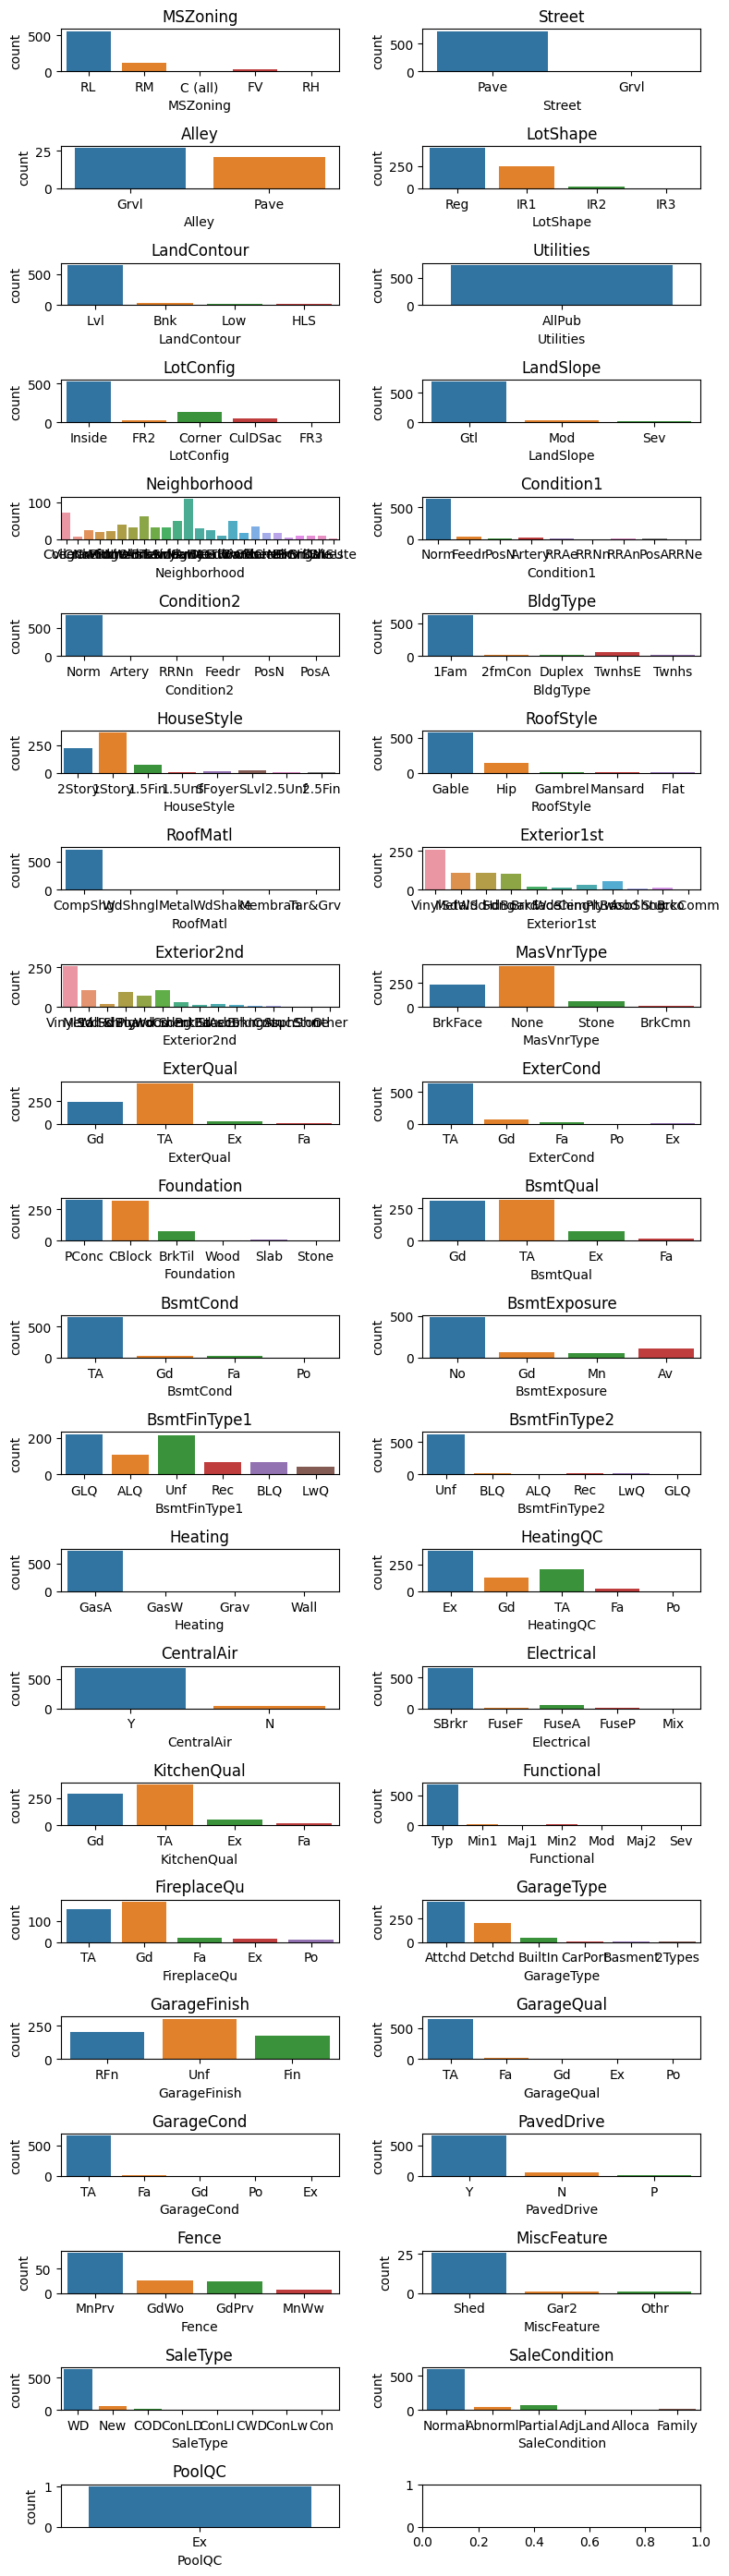

In [12]:
fig, axs = plt.subplots(math.ceil(len(categorical_features)/2), 2, figsize=(8,28))

axs = [x for xs in axs for x in xs]
for (feature_index, feature) in enumerate(categorical_features):
    ax = axs[feature_index]
    
    sns.countplot(x=train_df[feature], ax = ax)
    ax.title.set_text(feature)
    
plt.tight_layout()
plt.show()


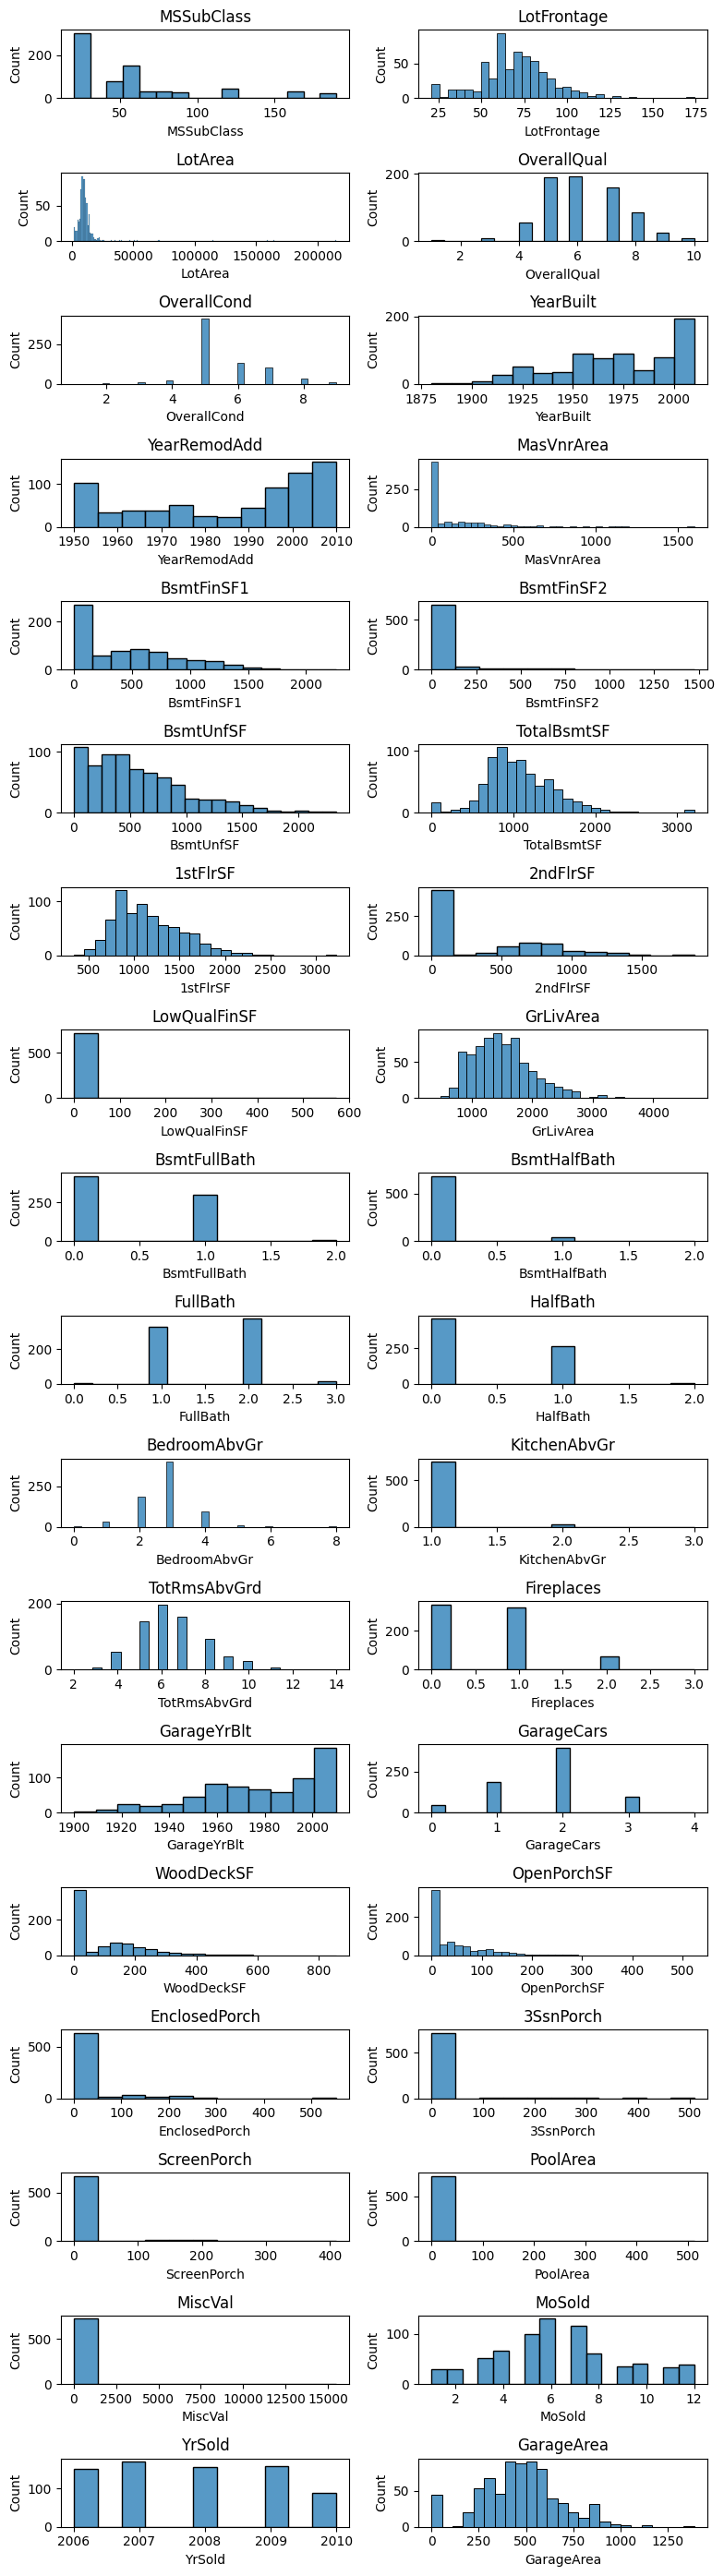

In [13]:
fig, axs = plt.subplots(math.ceil(len(numerical_features)/2), 2, figsize=(8,28))

axs = [x for xs in axs for x in xs]
for (feature_index, feature) in enumerate(numerical_features):
    ax = axs[feature_index]
    
    sns.histplot(x=train_df[feature], ax = ax)
    ax.title.set_text(feature)

    
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

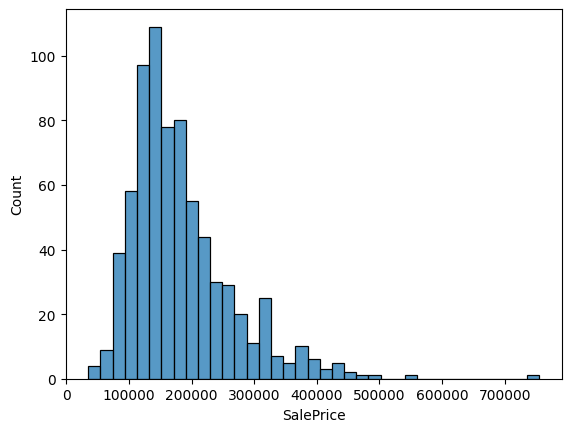

In [14]:
sns.histplot(train_df["SalePrice"])

In [18]:
def process_features(train_features, test_features, train_y, test_y, fill_na = True, unknown_value = -1):
    
    if fill_na:
        
        for field in categorical_features:
            train_features[field].fillna("na",inplace=True) 
            test_features[field].fillna("na",inplace=True) 
        
        imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

        train_features[numerical_features] = imp_mean.fit_transform(train_features[numerical_features])
        test_features[numerical_features] = imp_mean.transform(test_features[numerical_features])
    
    encoder = OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value=unknown_value)
    train_features[categorical_features] = encoder.fit_transform(train_features[categorical_features])
    test_features[categorical_features] = encoder.transform(test_features[categorical_features])
        
    return train_features, train_y,  test_features, test_y


In [19]:
def eval_model(model, train_x, train_y, test_x, test_y):
    
    train_preds = model.predict(train_x)
    test_preds = model.predict(test_x)

    train_preds_df = pd.DataFrame(zip(train_y, train_preds), columns = ["y", "pred"])
    test_preds_df = pd.DataFrame(zip(test_y, test_preds), columns = ["y", "pred"])

    train_preds_df["dataset"] = "train"
    test_preds_df["dataset"] = "test"

    preds_df = pd.concat([train_preds_df, test_preds_df])
    
    train_mae = mean_absolute_error(train_preds_df["y"], train_preds_df["pred"])
    test_mae = mean_absolute_error(test_preds_df["y"], test_preds_df["pred"])
    
    train_mape = mean_absolute_percentage_error(train_preds_df["y"], train_preds_df["pred"])
    test_mape = mean_absolute_percentage_error(test_preds_df["y"], test_preds_df["pred"])
    
    
    print(f"train_mae - {train_mae} test_mae - {test_mae}")
    print(f"train_mape - {train_mape} test_mape - {test_mape}")
    
    sns.scatterplot(data=preds_df, x="y", y="pred", hue = "dataset")
    
    

train_mae - 7926.680849160859 test_mae - 18009.791074167846
train_mape - 0.04675019043130657 test_mape - 0.10541245335101956


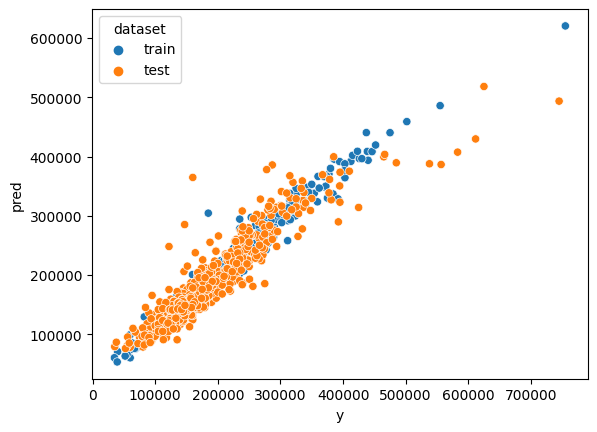

In [23]:
def train_eval_randomforest(n_estimators = 90, max_depth = 20, min_samples_split = 5):
    
    train_features = train_df[categorical_features + numerical_features]
    test_features = test_df[categorical_features + numerical_features]
        
    train_x, train_y, test_x, test_y = process_features(train_features, test_features, train_df["SalePrice"], test_df["SalePrice"], fill_na = True, unknown_value = -1)
    
    model = RandomForestRegressor(n_estimators = n_estimators, random_state=0, max_depth = max_depth, min_samples_split = min_samples_split)
    
    model.fit(train_x, train_y)
    
    eval_model(model, train_x, train_y, test_x, test_y)


train_eval_randomforest()

[18:28:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train_mae - 7168.597795376712 test_mae - 16571.762061215755
train_mape - 0.044305926651803974 test_mape - 0.09627427382300624


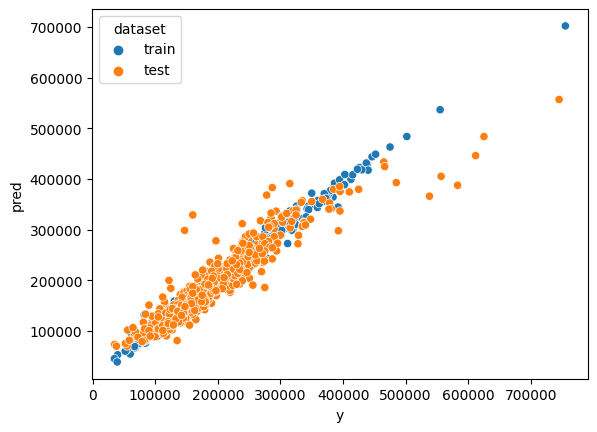

In [25]:
def train_eval_xgboost(n_estimators=70, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.5):
    
    train_features = train_df[categorical_features + numerical_features]
    test_features = test_df[categorical_features + numerical_features]
        
    train_x, train_y, test_x, test_y = process_features(train_features, test_features, train_df["SalePrice"], test_df["SalePrice"], fill_na = False, unknown_value = -1)
    
    
    model = xgboost.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, eta=eta, subsample=subsample, colsample_bytree=colsample_bytree)

    model.fit(train_x, train_y)

    
    eval_model(model, train_x, train_y, test_x, test_y)


train_eval_xgboost()

train_mae - 3.2525523948444894e-10 test_mae - 29112.183569597615
train_mape - 2.071595776439245e-15 test_mape - 0.17740727045301533


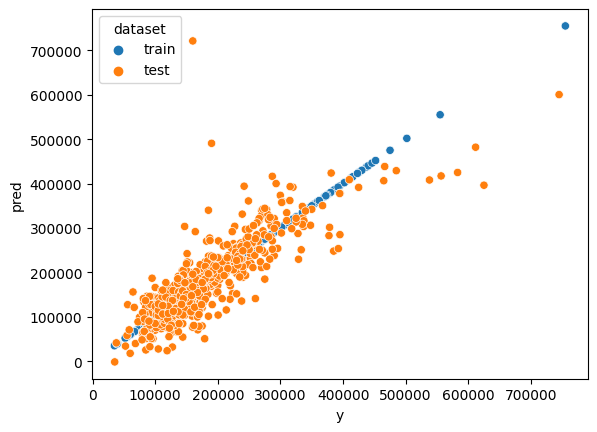

In [46]:
from sklearn.preprocessing import MinMaxScaler

def train_lr(unknown_value = -1, degree = 2):
    
    
    train_features = train_df[categorical_features + numerical_features]
    test_features = test_df[categorical_features + numerical_features]

    for field in categorical_features:
        train_features[field].fillna("na",inplace=True) 
        test_features[field].fillna("na",inplace=True) 
        
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

    train_features[numerical_features] = imp_mean.fit_transform(train_features[numerical_features])
    test_features[numerical_features] = imp_mean.transform(test_features[numerical_features])

    encoder = OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value=unknown_value)
    train_features[categorical_features] = encoder.fit_transform(train_features[categorical_features])
    test_features[categorical_features] = encoder.transform(test_features[categorical_features])
    

    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(train_features)
    test_X = poly.transform(test_features)


    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    test_X = scaler.transform(test_X)
    
    lr = LinearRegression()
    lr.fit(X, train_df["SalePrice"])


    eval_model(lr, X, train_df["SalePrice"], test_X, test_df["SalePrice"])

train_lr()

train_mae - 18022.05277088907 test_mae - 20065.09058770772
train_mape - 0.10753176273463365 test_mape - 0.11833680277995025


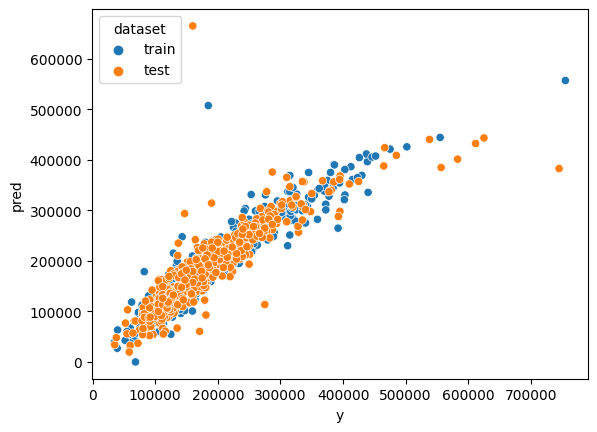

In [26]:
def train_eval_ridge(alpha = 1.0):
    
    train_features = train_df[categorical_features + numerical_features]
    test_features = test_df[categorical_features + numerical_features]
        
    train_x, train_y, test_x, test_y = process_features(train_features, test_features, train_df["SalePrice"], test_df["SalePrice"], fill_na = True, unknown_value = -1)
    
    
    model = Ridge(alpha=alpha)
    
    model.fit(train_x, train_y)

    
    eval_model(model, train_x, train_y, test_x, test_y)


train_eval_ridge()

train_mae - 22117.85365011419 test_mae - 23095.79886011276
train_mape - 0.12497251076097589 test_mape - 0.13375179894941008


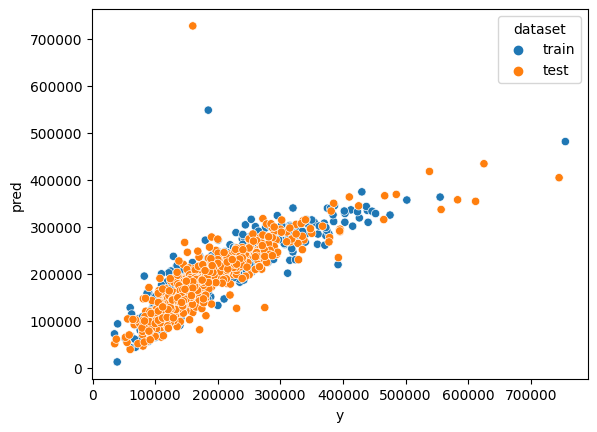

In [27]:
def train_eval_svr(c = 2.0, epsilon=0.1, kernel = "linear"):
    
    train_features = train_df[categorical_features + numerical_features]
    test_features = test_df[categorical_features + numerical_features]
        
    train_x, train_y, test_x, test_y = process_features(train_features, test_features, train_df["SalePrice"], test_df["SalePrice"], fill_na = True, unknown_value = -1)
    
    
    model = SVR(C=c, epsilon=epsilon, kernel = kernel)
    
    model.fit(train_x, train_y)

    
    eval_model(model, train_x, train_y, test_x, test_y)


train_eval_svr(kernel = "linear")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [42]:
X

array([[1.000000e+00, 3.000000e+00, 1.000000e+00, ..., 4.032064e+06,
        1.100384e+06, 3.003040e+05],
       [1.000000e+00, 3.000000e+00, 1.000000e+00, ..., 4.028049e+06,
        9.232200e+05, 2.116000e+05],
       [1.000000e+00, 3.000000e+00, 1.000000e+00, ..., 4.032064e+06,
        1.220864e+06, 3.696640e+05],
       ...,
       [1.000000e+00, 3.000000e+00, 1.000000e+00, ..., 4.036081e+06,
        1.269688e+06, 3.994240e+05],
       [1.000000e+00, 3.000000e+00, 1.000000e+00, ..., 4.036081e+06,
        1.783992e+06, 7.885440e+05],
       [1.000000e+00, 4.000000e+00, 1.000000e+00, ..., 4.036081e+06,
        1.082851e+06, 2.905210e+05]])

In [36]:
train_df.sample(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
593,120,RM,NaN,4435,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,140000


In [30]:
train_df.sample(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
56,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500
62,120,RL,44.0,6442,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,202500
362,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
